In [1]:
#Reading the dataset
import pandas as pd
df=pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
#Removing Serial Number column
df=df.iloc[:,1:]
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
#Checking for number of null values column wise
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

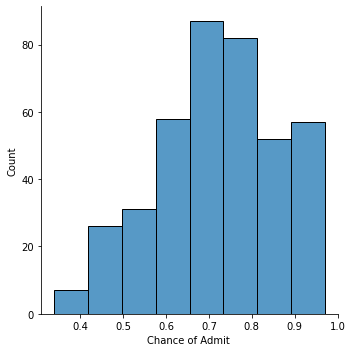

In [13]:
#Chance of Admit attribute is continuous so we will see its distribution using Seaborn Displot
#Displot is just like histogram but is univariate and bivariate
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df['Chance of Admit '],bins=8)
plt.show()

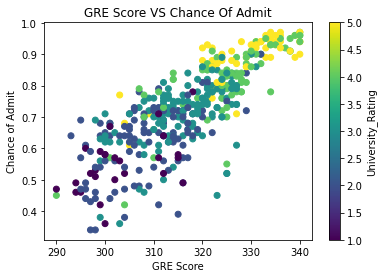

In [15]:
#Scatter plot for three vairable, the third variable is plotted by color range of University Rating
#GRE Score Vs Chance of Admit

color=df['University Rating']
plt.scatter(df['GRE Score'],df['Chance of Admit '],c=color)
cbar=plt.colorbar()
cbar.set_label('University_Rating')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score VS Chance Of Admit')
plt.show()

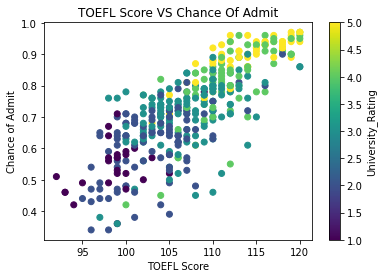

In [16]:
color=df['University Rating']
plt.scatter(df['TOEFL Score'],df['Chance of Admit '],c=color)
cbar=plt.colorbar()
cbar.set_label('University_Rating')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('TOEFL Score VS Chance Of Admit')
plt.show()

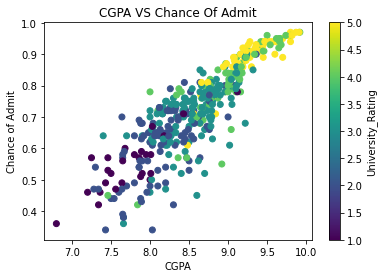

In [18]:
color=df['University Rating']
plt.scatter(df['CGPA'],df['Chance of Admit '],c=color)
cbar=plt.colorbar()
cbar.set_label('University_Rating')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('CGPA VS Chance Of Admit')
plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

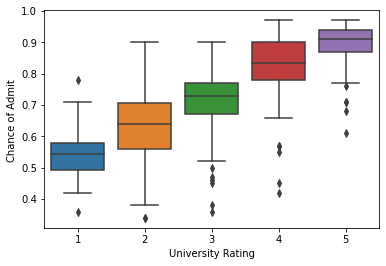

In [19]:
#Boxplot to find distribution of University Rating based on 5 number data
#The bottom line is minimum, the second line of the box is Q1(first quartile), the line inside the box
#is median and the line above median is Q3(third quartile) and the last line is maximum
#The circles outside of the box plot are outliers

#What does this boxplot say?
#We are seeing how the data is distributed (Chance of Admit probability (<=1)) attribute according to University Rating
#We can see that as Univeristy Rating is increasing the Chance of Admit probability also increases.

sns.boxplot(x='University Rating',y='Chance of Admit ',data=df)

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

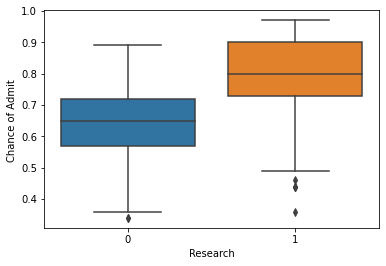

In [20]:
sns.boxplot(x='Research',y='Chance of Admit ',data=df)

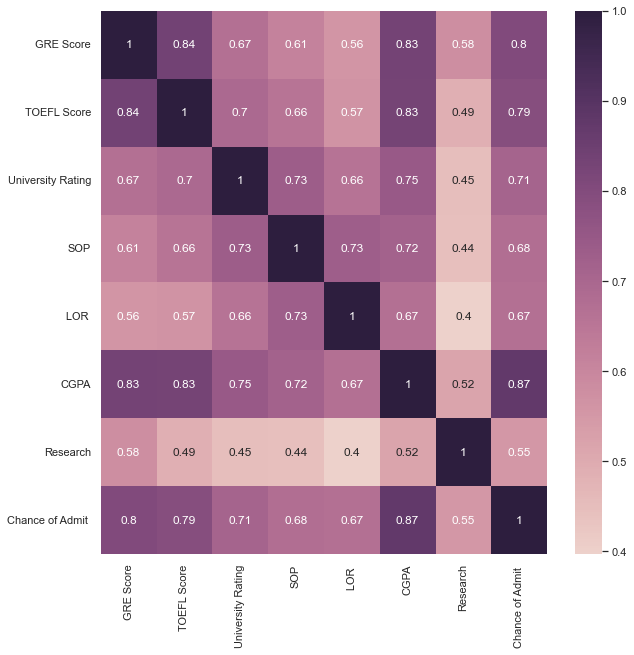

In [22]:
#Heatmap is a correlation matrix
#IT is used to represent the common values, the darker the color, the more common the values are
#the corr() function selects the ideal (read: numerical) features for the plot.
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(),cmap=sns.cubehelix_palette(as_cmap=True),annot=True)
plt.show()

Correlation is a dimensionless unit that determines the degree to which variables are related.
It measures both strength and direction of the linear relationship between variables.
Its value lies between 0 and 1, depicting strength.
A heat map represents these coefficients to visualize the strength of correlation among variables. It helps find features that are best for Machine Learning model building.